<a href="https://colab.research.google.com/github/SAIKARTHIGEYAN1512/review2/blob/main/inception_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
IMG_SIZE = 224
TRAINING_DIR = "/content/chest_xray/chest_xray/train"
training_datagen = ImageDataGenerator(rescale = 1./255 ,
                                      shear_range=0.2,
                                      zoom_range=0.2)
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                       target_size=(IMG_SIZE,IMG_SIZE) ,class_mode='categorical',
                                                       batch_size=64,shuffle=True )


TEST_DIR = "/content/chest_xray/chest_xray/test"
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=(IMG_SIZE,IMG_SIZE), class_mode = None , batch_size = 64,
                                                  shuffle = False)


VAL_DIR = "/content/chest_xray/chest_xray/val"
val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = val_datagen.flow_from_directory(TEST_DIR,target_size=(IMG_SIZE,IMG_SIZE),class_mode='categorical',
                                                       batch_size=64,shuffle= False)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


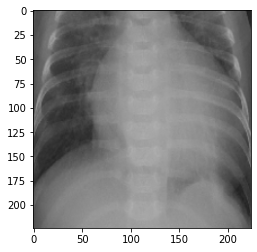

In [ ]:
x,y = train_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [ ]:
import tensorflow_hub as hub

URL='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1' 
feature_extractor = hub.KerasLayer(URL, input_shape=(299,299,3))
feature_extractor.trainable = False

In [ ]:
model = tf.keras.models.Sequential([    
    feature_extractor,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation='softmax')
    
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense_6 (Dense)              (None, 64)                131136    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 21,938,210
Trainable params: 135,426
Non-trainable params: 21,802,784
____________________________________

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs['accuracy']>=0.95):
      self.model.stop_training=True

callbacks=myCallback()
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')]
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=METRICS )

history = model.fit(train_generator , epochs=5 , callbacks=[callbacks], validation_data=val_generator)

Epoch 1/5
82/82 [==============================] - 608s 7s/step - loss: 0.4851 - accuracy: 0.7604 - precision: 0.7604 - recall: 0.7604 - val_loss: 0.5864 - val_accuracy: 0.6939 - val_precision: 0.6939 - val_recall: 0.6939
Epoch 2/5
82/82 [==============================] - 604s 7s/step - loss: 0.3094 - accuracy: 0.8671 - precision: 0.8671 - recall: 0.8671 - val_loss: 0.5110 - val_accuracy: 0.7580 - val_precision: 0.7580 - val_recall: 0.7580
Epoch 3/5
82/82 [==============================] - 603s 7s/step - loss: 0.2536 - accuracy: 0.8970 - precision: 0.8970 - recall: 0.8970 - val_loss: 0.5222 - val_accuracy: 0.7724 - val_precision: 0.7724 - val_recall: 0.7724
Epoch 4/5
82/82 [==============================] - 603s 7s/step - loss: 0.2257 - accuracy: 0.9091 - precision: 0.9091 - recall: 0.9091 - val_loss: 0.4897 - val_accuracy: 0.7788 - val_precision: 0.7788 - val_recall: 0.7788
Epoch 5/5
82/82 [==============================] - 601s 7s/step - loss: 0.2118 - accuracy: 0.9176 - precision: 0